# train Rock vs HipHop ml

this notebook used `../data/features_all.csv`
- LogisticRegression & RandomForest comparation
- save fial pipeline（including StandardScaler + RandomForest）

In [ ]:
# import common libraries
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set()

In [ ]:
# read CSV (ensure path is relative to notebooks directory)
data_path = "../data/features_all.csv"
df = pd.read_csv(data_path, encoding="utf-8")
print("Data shape:", df.shape)
print('\nLabel counts:')
print(df['label'].value_counts())
df.head()

Data shape: (400, 10)

Label counts:
label
hiphop    201
rock      199
Name: count, dtype: int64


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,label,filename
0,0.999740,0.968992,0.223890,1765.953404,1609.792554,0.031008,129.199219,0.476870,hiphop,1000 Handz - Achilles.mp3
1,0.999864,0.981016,0.351564,1697.273918,1166.588907,0.018984,139.674831,0.407348,hiphop,1000 Handz - Ambition.mp3
2,0.999578,0.922872,0.264012,2803.172975,2764.276873,0.077128,99.384014,0.496507,hiphop,1000 Handz - Archangel.mp3
3,0.999730,0.959210,0.294265,2265.264888,2080.939496,0.040790,123.046875,0.478795,hiphop,1000 Handz - Around.mp3
4,0.999303,0.941475,0.218975,2958.073692,2797.078115,0.058525,97.508844,0.486013,hiphop,1000 Handz - Beach Club.mp3


In [ ]:
# prepare features and labels
X = df.drop(columns=['label', 'filename']).astype(float).values
y = df['label'].values
le = LabelEncoder()
y_enc = le.fit_transform(y)
print('Classes:', le.classes_)

Classes: ['hiphop' 'rock']


In [ ]:
# split train/test sets (stratified to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (320, 8) Test shape: (80, 8)


In [ ]:
# Baseline: Logistic Regression
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)
print('Logistic Regression accuracy:', accuracy_score(y_test, pred_lr))
print('\nClassification report (LR):')
print(classification_report(y_test, pred_lr, target_names=le.classes_))

Logistic Regression accuracy: 0.675

Classification report (LR):
              precision    recall  f1-score   support

      hiphop       0.65      0.75      0.70        40
        rock       0.71      0.60      0.65        40

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.68      0.68      0.67        80



In [ ]:
# Random Forest
pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200, random_state=42))
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
print('Random Forest accuracy:', accuracy_score(y_test, pred_rf))
print('\nClassification report (RF):')
print(classification_report(y_test, pred_rf, target_names=le.classes_))

Random Forest accuracy: 0.6875

Classification report (RF):
              precision    recall  f1-score   support

      hiphop       0.67      0.72      0.70        40
        rock       0.70      0.65      0.68        40

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.69      0.69      0.69        80



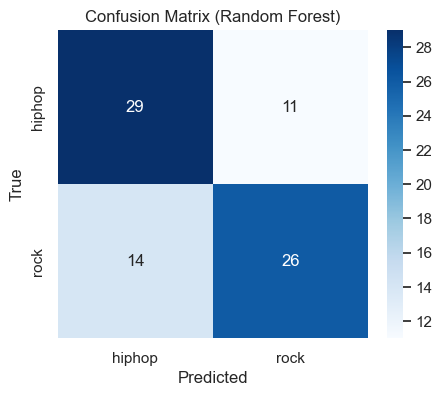

In [ ]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [ ]:
# 5-fold Cross-Validation for Random Forest
pipe_cv = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200, random_state=42))
scores = cross_val_score(pipe_cv, X, y_enc, cv=5, scoring='accuracy')
print('5-fold CV accuracies:', scores)
print('Mean CV accuracy:', scores.mean())

5-fold CV accuracies: [0.625  0.4875 0.5625 0.55   0.5   ]
Mean CV accuracy: 0.545


In [ ]:
# Train final model on all data and save
final_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200, random_state=42))
final_pipe.fit(X, y_enc)
model_path = "../data/model_rock_hiphop.joblib"
le_path = "../data/label_encoder.joblib"
joblib.dump(final_pipe, model_path)
joblib.dump(le, le_path)
print('Saved final model to', model_path)
print('Saved label encoder to', le_path)

Saved final model to ../data/model_rock_hiphop.joblib
Saved label encoder to ../data/label_encoder.joblib
